In [2]:
import os
import json
import requests
import pandas as pd
import numpy as np
import datetime

* Base url for api call for each user.

In [3]:
# give information about user's submission history
URL1 = "https://codeforces.com/api/user.status?handle="
# give informaiton about user's competition history
URL2 = "https://codeforces.com/api/user.rating?handle="

* Helper function to retrive data from server

In [4]:
def getSubData(uname):
    return json.loads(requests.get(URL1 + uname).content)['result']

def getCompiData(uname):
    return json.loads(requests.get(URL2 + uname).content)['result']

In [6]:
user = 'poojanpatel101'
subData = getSubData(user)
compiData = getCompiData(user)

In [7]:
print("Total Number of sumbission for user %s is %d" % (user,len(subData)))

Total Number of sumbission for user poojanpatel101 is 411


In [8]:
print("Total Number of compitition participated for user %s is %d" % (user,len(compiData)))

Total Number of compitition participated for user poojanpatel101 is 28


# Data Mapping and Transformation

In [37]:
subData[0].keys()

dict_keys(['id', 'contestId', 'creationTimeSeconds', 'relativeTimeSeconds', 'problem', 'author', 'programmingLanguage', 'verdict', 'testset', 'passedTestCount', 'timeConsumedMillis', 'memoryConsumedBytes'])

In [42]:
contest_submissions = [d for d in subData if d['author']['participantType']=='CONTESTANT']

In [49]:
verd = {}
for c in contest_submissions:
    if c['verdict'] not in verd:
        verd[c['verdict']] = 1
    else:
        verd[c['verdict']] += 1 

In [54]:
verd

{'OK': 63,
 'TIME_LIMIT_EXCEEDED': 4,
 'WRONG_ANSWER': 80,
 'CHALLENGED': 2,
 'RUNTIME_ERROR': 2}

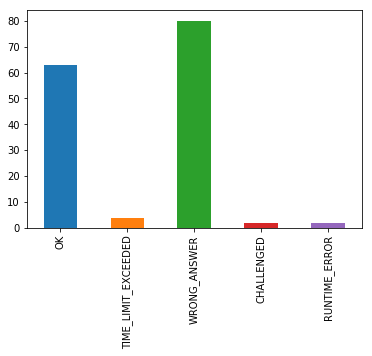

In [59]:
pd.Series(verd).plot(kind='bar')

In [19]:
compiData[0]

{'contestId': 689,
 'contestName': 'Codeforces Round #361 (Div. 2)',
 'handle': 'poojanpatel101',
 'rank': 1600,
 'ratingUpdateTimeSeconds': 1467830100,
 'oldRating': 1500,
 'newRating': 1399}

# Plot 1:
* This plot shows comparison between two users compititon rating.
* It will allow user to track and compare their progress with other user from time to time.
* Each user starts with 1500 rating.
* This will allow one team member compare their rating and improve accordinly.

In [13]:
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='poojan124', api_key='d2TmZOWV0SEY0R5BSUKE')

In [32]:
def find_rating(date, data):
    for d in data:
        if date == datetime.datetime.fromtimestamp(float(d['ratingUpdateTimeSeconds'])):
            return d['newRating']

def plot_two_rating(username1,username2):
    compiData1 = getCompiData(username1)
    compiData2 = getCompiData(username2)
    
    date_user1 = sorted(list(set([datetime.datetime.fromtimestamp(float(i['ratingUpdateTimeSeconds'])) for i in compiData1])))
    date_user2 = sorted(list(set([datetime.datetime.fromtimestamp(float(i['ratingUpdateTimeSeconds'])) for i in compiData2])))

    total_dates = sorted(list(set(date_user1 + date_user2)))
    
    data1 = []
    data2 = []
    for date_ in total_dates:
        if date_ in date_user1:
            data1.append((date_, find_rating(date_,compiData1)))
        else:
            if len(data1)>0:
                data1.append((date_,data1[-1][1]))
            else:
                data1.append((date_,1500))

        if date_ in date_user2:
            data2.append((date_, find_rating(date_,compiData2)))
        else:
            if len(data2)>0:
                data2.append((date_,data2[-1][1]))
            else:
                data2.append((date_,1500))

    pldata1 = go.Scatter(
        x=[x[0] for x in data1], 
        y=[x[1] for x in data1], 
#         text = [compiData[0] for i in range(len(data2))],
#         hoverinfo ='text',
        name=username1
    )
    pldata2 = go.Scatter(
        x=[x[0] for x in data2], 
        y=[x[1] for x in data2], 
#         text = [compiData[0] for i in range(len(data2))],
#         hoverinfo ='text',
        name=username2
    )
    layout = dict(
        title='Contest rating comparision between ' + username1 + " and " + username2,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(count=1,
                        label='YTD',
                        step='year',
                        stepmode='todate'),
                    dict(count=1,
                        label='1y',
                        step='year',
                        stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )
    fig = dict(data=[pldata1,pldata2], layout=layout)
    return py.iplot(fig, filename = "Manually Set Range")

In [33]:
plot_two_rating('tourist','petr')